# CS6650 (Web M.Tech): Smart Sensing for Internet of Things
#### Homework 2 (Part A) (Diwali 2024 Semester)
Submission Deadline : Nov 29th, 2024

---
Name: `Dipendu Ghosh`

Roll No: `CS23M509`

Email: `CS23M509@smail.iitm.ac.in`

---

### Android-based GNSS Measurements

<div style="display:flex; overflow: hidden;">
  <img src="./images/image6.png" width="400" height="250" style="margin:20px; object-fit: cover; object-position: top;">
  <div style="margin:20px;">
    <p>GNSS (Global Navigation Satellite System) today includes a variety of satellite constellations, including the GPS (American, global), GLONASS (Russian, global), BeiDou (Chinese, global), Galileo (European, global), NavIC (Indian, regional) and QZSS (Japanese, regional). Depending on your smartphone’s hardware capabilities, you can tap into signals from such constellations and update your location. Google provides an array of open-source <a href="https://github.com/google/gps-measurement-tools">tools</a> for performing GNSS-related measurements on commodity Android smartphones and analyzing such datasets.</p>
    <p>
    Download and install this app ( <a href="https://play.google.com/store/apps/details?id=com.google.android.apps.location.gps.gnsslogger&hl=en_IN&gl=US">GnssLogger App – Apps on Google Play</a>) to get started. Ensure the location permissions are provided to this app, and you have turned on your phone's location service (e.g., GPS). Turn on the "location" switch in the GNSSLogger app, as shown in the figure. Go to the next tab, "Log", and check whether you receive the GNSS specific diagnostic messages that include your location coordinates (latitude and longitude fix). <b>Make sure "Fused location" and "Network location" in the GNSS logger app are turned off before you start logging</b>. You can save the log data to a file and export this to the SD card or share it to your drive/email for offline use. Try playing with this app and make sure you are receiving the logs correctly. Cross-check the location coordinates reported by the app in Google maps.
    </p>
  </div>
</div>

---
Concentrate on the lines starting with keywords with “Fix” and `Status” (see GNSS Status [API](https://developer.android.com/reference/android/location/GnssStatus)). “Fix” related lines will provide you with the location coordinates of your phone. Only consider lines with “Fix, GPS” (raw GPS) and not “Fix, FLP” (fused location, uses IMU for correction).  <a id='measurements'></a>

- **Sample fix line (we are interested only in the red highlighted part)**: Fix, Provider, <span style="color:red">LatitudeDegrees, LongitudeDegrees</span>, AltitudeMeters, SpeedMps, AccuracyMeters, BearingDegrees, UnixTimeMillis, SpeedAccuracyMps, BearingAccuracyDegrees, elapsedRealtimeNanos.

    Example: Fix, GPS, <span style="color:red">12.997769, 80.240794</span>, -100.513824, 0.000000, 5.360000, 0.000000, 1616658843000, 0.49396357, 0.0, 1742433115036168

- **Sample status line (we are interested only in the red highlighted part)**: Status, UnixTimeMillis, SignalCount, SignalIndex, <span style="color:red">ConstellationType, Svid</span>, CarrierFrequencyHz, <span style="color:red">Cn0DbHz, AzimuthDegrees, ElevationDegrees, UsedInFix</span>, HasAlmanacData, HasEphemerisData, BasebandCn0DbHz
Example: Status, 1616658843000, 40, 38, <span style="color:red">6, 1</span>, 1575420032, <span style="color:red">15.00, 355.00, 37.00, 1</span>, 1, 0,

- **ConstellationType**: Only use GPS (for now, please ignore data from GLONASS, BeiDou etc., even if your phone supports it). Flag for GPS = 1, (see [this](https://developer.android.com/reference/android/location/GnssStatus#CONSTELLATION_GPS))
- **Svid**: Satellite ID
- **Cn0DbHz**: Signal Strength or SNR of the signal received from the particular satellite.
- **AzimuthDegrees (0 - 360) & Elevation Degrees (0 - 90)**: of the satellite ([Wiki](https://en.wikipedia.org/wiki/Azimuth))
- **UsedInFix**: Indicates whether this particular satellite was used for the latest fix for multilateration (remember, you need at least 4 of them?).

<div style="display:flex; flex-direction: column; align-items: center;">
        <figure style="margin: 20px; text-align: center; float: left;">
          <img src="./images/image3.png" width="600" height="400" >
          <figcaption>Fig. 1: Azimuth and Elevation</figcaption>
        </figure>
    </div>


### Tasks

First, create a directory following the `<Your_Roll>_CS6650H23` structure. Next, download this notebook and save it in the directory you created.


<div style="display:flex;">
  <img src="./images/image2.jpg" width="400" height="200" style="margin:20px;">
  <div style="margin:20px;">
    <p>Collect the <a href="#measurements">above</a> measurement logs at three distinct locations as indicated in the picture left.</p>
    <ol>
    <li>The smartphone is under the open sky a few meters from the entrance/door of your building.</li>
    <li> The smartphone is at the entrance (or some window) of your building, the sky is partially visible, and </li>
    <li> The smartphone is completely inside the building, very limited portion of the sky is visible maybe through the door/window.</li>
    </ol>
    <p>At each of these locations, collect GNSSLogger data for about 5 - 10 minutes (Perform the experiments on a sunny day with a clear sky). Now perform the following tasks.</p>
  </div>
</div>


1. [ ] [Attach sky photos of data collection locations (10 points)](#task1)
2. [ ] [Compute and plot location errors using haversine distance (15 points)](#task2)
3. [ ] [Analyze status entries before fix and their relation to error (45 points)](#task3)
4. [ ] [Show satellite statistics and SNR plots by azimuth and elevation (20 points)](#task4)
5. [ ] [Plot SNR by azimuth in angular space with satellite image (10 points)](#task5)

---

#### Guidelines for the Assignment
Before you start working on the assignment, please read the following instructions carefully:


- Clean and well-documented code is expected. Your code should be organized in a clear and readable manner, with each task separated into its own section of the notebook.

- There will be no separate PDF report required. Instead, provide a detailed but to-the-point discussion in the observation section for each task. The observation section (in Markdown, Refer to [Markdown-Cheatsheet](https://github.com/lifeparticle/Markdown-Cheatsheet)) includes a clear and concise description of the task, the approach used to solve it, assumptions, and inferences.

- Any extraneous information that does not address the question should be removed before submission. This will help to ensure that the answer is clear and easy to follow.

Failure to follow these practices will result in a penalty.

**Deadline: $29^{th}$, Nov, 2024**

#### Submission Instructions
- Compress the top-level directory (ZIP format) containing this notebook with your code and the data used for the assignment. (do not remove the outputs from the notebook cells)

- **You MUST refrain from consulting your homework code with others**. Any plagiarism found in your code (or somebody who is referring to your code) will result in zero credits in this assignment.

- Submissions after the deadline will not be entertained.


<div class="alert alert-block alert-success">
    <b>Tip</b>: Our recommendation to the students is to begin the assignment as soon as possible. If you have any doubts, please fill out the <a href="https://forms.gle/oMSkBsijAdWFS8rm7">Google Form</a> with the necessary information and the instructor will address all concerns in the next class.
</div>


### Explanation:

1. **PIL (Pillow)**: Allows you to work with image data, such as opening, manipulating, and saving image files. Useful for processing or visualizing images.

2. **Matplotlib**: A library for creating static, animated, and interactive plots. Here, it is used via `pyplot`, which provides a MATLAB-like interface for making plots.

3. **OS**: A module that provides a way of interacting with the operating system, including file operations, environment variables, and path manipulations.

4. **Math**: Provides mathematical functions like trigonometric operations, logarithms, and other mathematical utilities.

5. **Numpy**: A core library for numerical computing in Python. It is widely used for handling arrays, matrices, and performing a wide variety of numerical computations.

6. **Seaborn**: A higher-level interface for creating attractive and informative statistical graphics. It is built on top of matplotlib, simplifying the process of creating plots.

7. **Statistics**: Provides basic statistics functions. The `median` function here computes the median of a list of numbers.

8. **Pandas**: A data analysis library that offers data structures like DataFrames, useful for working with structured data (such as CSV files or SQL databases).

9. **Tabulate**: A library used to display tabular data in a human-readable format, useful for printing tables in a structured way.

10. **Seaborn Theme**: `sns.set_theme()` applies a consistent style to the seaborn plots, making them more aesthetically pleasing by setting a predefined style for graphs.

11. **Seaborn Color Palette**: The `sns.color_palette()` generates a list of colors to use in visualizations, ensuring a coherent and visually appealing color scheme for plots. 

In [22]:
# Import the Image module from the Python Imaging Library (PIL) to work with image files
from PIL import Image

# Import matplotlib for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Import the os module to interact with the operating system, e.g., for file handling
import os

# Import the math module for mathematical functions, such as square roots, trigonometry, etc.
import math

# Import numpy for numerical computations, handling arrays, matrices, etc.
import numpy as np

# Import seaborn for statistical data visualization, built on top of matplotlib
import seaborn as sns

# Import median function from statistics module to calculate the median of a dataset
from statistics import median

# Import pandas for data manipulation and analysis (especially useful for handling data frames)
import pandas as pd

# Import tabulate for formatting and displaying tables in a readable form
from tabulate import tabulate

# Set the seaborn theme for better aesthetics in visualizations
sns.set_theme()

# Define a color palette from seaborn's default set of colors for use in plots
cmap = sns.color_palette()


### Breakdown of Each Section:
1. **Header Mappings**: 
   - These mappings define the position of each field (e.g., latitude, longitude) within the CSV files based on their header names. This allows easy identification of specific columns when parsing each line.

2. **File Paths and Titles**: 
   - `log_file_paths` stores the paths to the raw GNSS log files, while `titles` contains the corresponding labels for each sky view condition (Open, Partial, Limited). 

3. **Processing Each Log**:
   - For each log file, the script initializes `fix_data` and `status_data` lists to store the parsed data.
   - The script then opens the log files for reading and the output files for writing (`fix.txt` and `status.txt`).

4. **Reading and Parsing Each Line**:
   - Lines starting with "Fix,GPS," are identified as containing location data, and lines starting with "Status," contain signal quality information.
   - The relevant fields are extracted based on the header mappings and written to the respective output files.

5. **Error Handling**:
   - The script includes exception handling for missing or malformed data using `try-except` blocks to catch `IndexError` when a field is missing.

6. **Unique Satellite IDs**:
   - After processing all lines, the script extracts unique satellite IDs from the status data and prints a summary for each sky view condition.

In [23]:
# Define a mapping for the header indices in the 'Fix' data entries. These mappings help identify each field by name.
fix_header_map = {
    "Fix": 0,  # Index for the 'Fix' entry in the log data (start of line)
    "Provider": 1,  # Index for 'Provider' (e.g., GPS, GLONASS, etc.)
    "LatitudeDegrees": 2,  # Index for 'LatitudeDegrees'
    "LongitudeDegrees": 3,  # Index for 'LongitudeDegrees'
    "AltitudeMeters": 4,  # Index for 'AltitudeMeters'
    "SpeedMps": 5,  # Index for 'SpeedMps' (speed in meters per second)
    "AccuracyMeters": 6,  # Index for 'AccuracyMeters' (location accuracy in meters)
    "BearingDegrees": 7,  # Index for 'BearingDegrees' (bearing angle in degrees)
    "UnixTimeMillis": 8,  # Index for 'UnixTimeMillis' (timestamp in milliseconds since 1970)
    "SpeedAccuracyMps": 9,  # Index for 'SpeedAccuracyMps' (speed accuracy)
    "BearingAccuracyDegrees": 10,  # Index for 'BearingAccuracyDegrees'
    "elapsedRealtimeNanos": 11,  # Index for 'elapsedRealtimeNanos' (real-time nanoseconds)
    "VerticalAccuracyMeters": 12,  # Index for 'VerticalAccuracyMeters' (vertical accuracy in meters)
    "MockLocation": 13,  # Index for 'MockLocation' (whether it's a mock location)
    "NumberOfUsedSignals": 14,  # Index for 'NumberOfUsedSignals' (number of satellites used in the fix)
    "VerticalSpeedAccuracyMps": 15,  # Index for 'VerticalSpeedAccuracyMps'
    "SolutionType": 16  # Index for 'SolutionType' (e.g., GPS, A-GPS)
}

# Define a simplified header mapping for the 'Fix' data, keeping only essential fields.
filtered_fix_header_map = {
    "LatitudeDegrees": 0,  # Latitude field in the filtered data
    "LongitudeDegrees": 1,  # Longitude field in the filtered data
    "UnixTimeMillis": 2,  # Timestamp field in the filtered data
}

# Define a mapping for the header indices in the 'Status' data entries, which provide information about the signal status.
status_header_map = {
    "Status": 0,  # Index for 'Status' field (status of signal)
    "UnixTimeMillis": 1,  # Index for 'UnixTimeMillis' (timestamp for signal status)
    "SignalCount": 2,  # Index for 'SignalCount' (total number of signals)
    "SignalIndex": 3,  # Index for 'SignalIndex' (index of the current signal)
    "ConstellationType": 4,  # Index for 'ConstellationType' (satellite constellation, e.g., GPS, GLONASS)
    "Svid": 5,  # Index for 'Svid' (Satellite Vehicle ID)
    "CarrierFrequencyHz": 6,  # Index for 'CarrierFrequencyHz' (signal carrier frequency in Hz)
    "Cn0DbHz": 7,  # Index for 'Cn0DbHz' (signal strength in dB-Hz)
    "AzimuthDegrees": 8,  # Index for 'AzimuthDegrees' (direction of signal in degrees)
    "ElevationDegrees": 9,  # Index for 'ElevationDegrees' (angle above horizon in degrees)
    "UsedInFix": 10,  # Index for 'UsedInFix' (whether the signal was used in the position fix)
    "HasAlmanacData": 11,  # Index for 'HasAlmanacData' (whether the almanac data is available)
    "HasEphemerisData": 12,  # Index for 'HasEphemerisData' (whether ephemeris data is available)
    "BasebandCn0DbHz": 13  # Index for 'BasebandCn0DbHz' (signal strength at baseband)
}

# Define a simplified header mapping for the 'Status' data, keeping only relevant fields.
filtered_status_header_map = {
    "UnixTimeMillis": 0,  # Unix time of the status
    "ConstellationType": 1,  # Satellite constellation type (e.g., GPS, GLONASS)
    "Svid": 2,  # Satellite Vehicle ID
    "Cn0DbHz": 3,  # Signal strength
    "AzimuthDegrees": 4,  # Azimuth angle
    "ElevationDegrees": 5,  # Elevation angle
    "UsedInFix": 6,  # Whether the signal was used in the fix
}

# List of file paths to process (each log corresponds to a different sky view condition)
log_file_paths = [
    "dipendu_data/logs/1_sky_view_open/gnss_log_2024_11_14_12_48_41.txt",  # Open sky view log
    "dipendu_data/logs/2_sky_view_partial/gnss_log_2024_11_14_11_51_40.txt",  # Partial sky view log
    "dipendu_data/logs/3_sky_view_limited/gnss_log_2024_11_14_12_31_38.txt"  # Limited sky view log
]

# Corresponding titles for each sky view condition to label the logs
titles = [
    "Open",  # Title for open sky view
    "Partial",  # Title for partial sky view
    "Limited"  # Title for limited sky view
]

# Initialize lists to store the parsed fix and status data for all logs
all_fix_data = []  # Stores the parsed fix data for all log files
all_status_data = []  # Stores the parsed status data for all log files

# List to store metadata about the processed log files (e.g., file paths, titles)
log_files_metadata = []

# Loop through the log file paths and titles, processing each log file
for log_file_path, title in zip(log_file_paths, titles):
    log_dir = os.path.dirname(log_file_path)  # Extract the directory from the log file path
    fix_file_path = os.path.join(log_dir, "fix.txt")  # Construct the output path for the 'fix' file
    status_file_path = os.path.join(log_dir, "status.txt")  # Construct the output path for the 'status' file
    
    # Remove any existing fix and status files before processing the new data
    if os.path.exists(fix_file_path):
        os.remove(fix_file_path)  # Delete existing fix file if it exists
    if os.path.exists(status_file_path):
        os.remove(status_file_path)  # Delete existing status file if it exists
    
    # Lists to hold the parsed fix and status data for the current log file
    fix_data = []  # Will hold fix data (latitude, longitude, time)
    status_data = []  # Will hold status data (signal strength, satellite info)

    # Open the log file and corresponding output files (fix.txt and status.txt) for writing
    with open(log_file_path, 'r') as log_file, \
         open(fix_file_path, 'w') as fix_file, \
         open(status_file_path, 'w') as status_file:
        
        # Read and process each line in the log file
        for line in log_file:
            if line.startswith("Fix,GPS,"):  # If the line starts with 'Fix,GPS,' it contains position data
                fields = line.strip().split(',')  # Split the line into fields based on commas
                try:
                    # Extract latitude, longitude, and Unix timestamp using the header map
                    latitude = float(fields[fix_header_map["LatitudeDegrees"]])
                    longitude = float(fields[fix_header_map["LongitudeDegrees"]])
                    unix_time_millis = int(fields[fix_header_map["UnixTimeMillis"]])
                    
                    # Write the extracted fix data (latitude, longitude, time) to the fix.txt file
                    fix_file.write(f"{latitude},{longitude},{unix_time_millis}\n")
                    
                    # Append the extracted data to the fix_data list
                    fix_data.append({"LatitudeDegrees": latitude, "LongitudeDegrees": longitude, "UnixTimeMillis": unix_time_millis})
                except IndexError:
                    # Catch errors if any data is missing in the line (e.g., missing fields)
                    print(f"Error processing line (missing data): {line}")
            
            elif line.startswith("Status,"):  # If the line starts with 'Status,' it contains signal status data
                fields = line.strip().split(',')  # Split the line into fields based on commas
                try:
                    # Extract signal information: constellation type, signal used in fix, and timestamp
                    constellation_type = int(fields[status_header_map["ConstellationType"]])
                    used_in_fix = int(fields[status_header_map["UsedInFix"]])
                    
                    # Only process signals that are used in the fix and from GPS constellation (type 1)
                    if constellation_type == 1 and used_in_fix == 1:
                        unix_time_millis = fields[status_header_map["UnixTimeMillis"]]
                        # Handle empty Unix time by setting it to the minimum 64-bit integer value
                        if unix_time_millis == '':  
                            unix_time_millis = np.iinfo(np.int64).min
                        else:
                            unix_time_millis = int(unix_time_millis)
                        
                        # Extract other relevant status information like signal strength, Svid, azimuth, and elevation
                        svid = int(fields[status_header_map["Svid"]])
                        cn0_dbhz = float(fields[status_header_map["Cn0DbHz"]])
                        azimuth_degrees = float(fields[status_header_map["AzimuthDegrees"]])
                        elevation_degrees = float(fields[status_header_map["ElevationDegrees"]])
                        
                        # Write the extracted status data to the status.txt file
                        status_file.write(f"{unix_time_millis},{constellation_type},{svid},{cn0_dbhz},{azimuth_degrees},{elevation_degrees},{used_in_fix}\n")
                        
                        # Append the extracted status data to the status_data list
                        status_data.append({
                            "UnixTimeMillis": unix_time_millis,
                            "ConstellationType": constellation_type,
                            "Svid": svid,
                            "Cn0DbHz": cn0_dbhz,
                            "AzimuthDegrees": azimuth_degrees,
                            "ElevationDegrees": elevation_degrees,
                            "UsedInFix": used_in_fix
                        })
                except IndexError:
                    # Catch errors if there are missing fields in the status data
                    print(f"Error processing status line (missing data): {line}")
    
    # Extract unique Svids (satellite IDs) from the status data and print them
    unique_svids = {status["Svid"] for status in status_data}
    print(f"Number of unique Svids followed by the unique Svids when Sky View is {title} \t {len(unique_svids)} \t {unique_svids}")
    
    # Add the parsed fix and status data for the current log file to the master lists
    all_fix_data.append(fix_data)
    all_status_data.append(status_data)

Number of unique Svids followed by the unique Svids when Sky View is Open 	 11 	 {32, 3, 4, 7, 8, 9, 16, 26, 27, 28, 31}
Number of unique Svids followed by the unique Svids when Sky View is Partial 	 8 	 {32, 3, 4, 16, 21, 26, 28, 31}
Number of unique Svids followed by the unique Svids when Sky View is Limited 	 6 	 {32, 3, 4, 16, 26, 28}


### Task 1: Attach sky photos of data collection locations [10 points] <a id='task1'></a>
Attach photos of the three locations with the phone, where data is collected, particularly the exposure to the sky.


### Breakdown of Each Section:
1. **`images` List**:
   - The list `images` stores dictionaries, each containing the title (`"Open"`, `"Partial"`, `"Limited"`) and the file path to an image corresponding to a specific sky visibility scenario.

2. **`num_images`**:
   - This variable holds the number of images to adjust the figure size dynamically. It is computed by taking the length of the `images` list.

3. **`plt.figure(figsize=(5 * num_images, 5))`**:
   - Creates a new figure for displaying the images. The width is proportional to the number of images (each image gets 5 units of space), and the height is fixed at 5 units.

4. **`plt.suptitle()`**:
   - Sets the title for the entire figure, which will apply to all the images collectively. The `\n` in the title creates a line break, and `fontsize` and `fontweight` customize the appearance of the title.

5. **Looping through Images (`for i, image_info in enumerate(images)`)**:
   - The loop iterates over the `images` list. `i` is the index of the image (starting from 0), and `image_info` is the dictionary containing the image's title and path.

6. **`Image.open(image_info["path"])`**:
   - Each image is opened using the `PIL` library's `Image.open()` function, which loads the image from the path specified in the dictionary.

7. **`plt.subplot(1, num_images, i + 1)`**:
   - The `subplot` function arranges the images in a 1-row grid. The third argument (`i + 1`) determines the position of the current image in the grid (e.g., 1st, 2nd, 3rd, etc.).

8. **`plt.imshow(img)`**:
   - This function displays the image in the current subplot.

9. **`plt.axis('off')`**:
   - This removes the axis ticks and labels from the plot to make the image display cleaner without additional text.

10. **`plt.title(f"{i + 1}. Sky View is {image_info['title']}")`**:
    - The title for each subplot is set based on the `title` in the `image_info` dictionary, with the current index `i + 1` prepended to indicate the image number.

11. **`plt.tight_layout(rect=[0, 0.03, 1, 0.95])`**:
    - This adjusts the layout of the figure to avoid overlap. The `rect` argument specifies the area of the figure to use (keeping some margin for the title).

12. **`plt.show()`**:
    - Finally, this function renders and displays the figure with all the images.

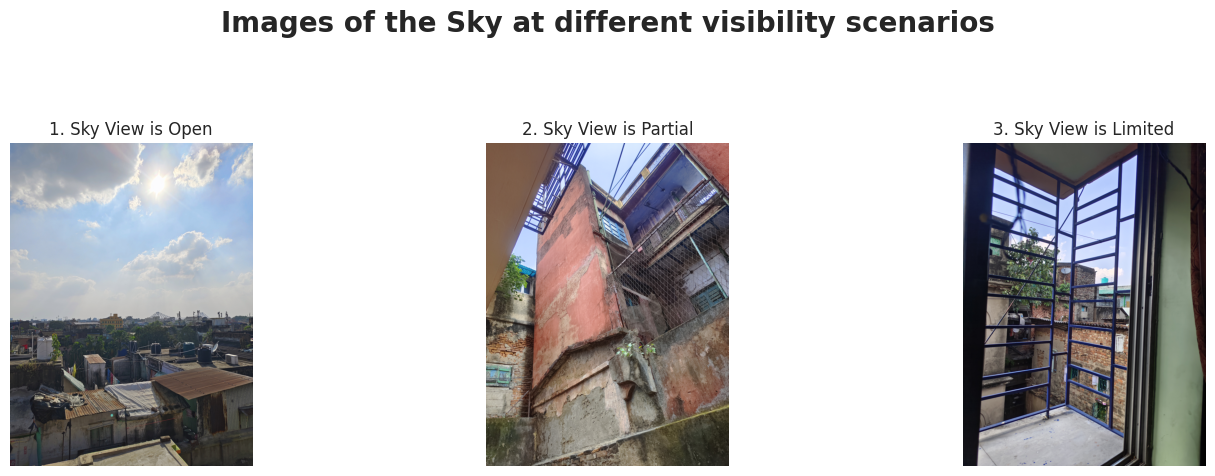

In [24]:
# Define a list of dictionaries containing image information. 
# Each dictionary holds the title and path of an image corresponding to different sky visibility scenarios.
images = [
    {"title": "Open", "path": "dipendu_data/images/1_sky_view_open/IMG_20241110_141155.jpg"},  # Open sky view image
    {"title": "Partial", "path": "dipendu_data/images/2_sky_view_partial/IMG_20241110_135352.jpg"},  # Partial sky view image
    {"title": "Limited", "path": "dipendu_data/images/3_sky_view_limited/IMG_20241110_132521.jpg"}  # Limited sky view image
]

# Get the number of images to dynamically adjust the layout
num_images = len(images)

# Create a new figure for plotting the images
# Set the figure size: width will be 5 times the number of images, and height is 5 units
plt.figure(figsize=(5 * num_images, 5))

# Set the title for the entire figure (all images together)
# This title explains what the images represent (sky view at different visibility scenarios)
plt.suptitle("Images of the Sky at different visibility scenarios\n", fontsize=20, fontweight="bold")

# Loop through the list of images using 'enumerate' to get both index (i) and the image info
for i, image_info in enumerate(images):
    # Open the image using PIL's Image.open function and the path specified in the dictionary
    img = Image.open(image_info["path"])
    
    # Create a subplot for each image, dynamically placing it in a 1-row grid based on the number of images
    plt.subplot(1, num_images, i + 1)
    
    # Display the image in the current subplot
    plt.imshow(img)
    
    # Remove axis ticks and labels for cleaner display of the image (we only want the image)
    plt.axis('off')
    
    # Set the title for the current image (e.g., "Sky View is Open", "Sky View is Partial", etc.)
    plt.title(f"{i + 1}. Sky View is {image_info['title']}")

# Adjust the layout to avoid overlap and ensure the title is positioned well
# The 'rect' parameter defines the bounding box for the layout adjustment
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the figure with all the images
plt.show()


##### Observations Task 1

Edit this section to put your observations.

### Task 2: Compute and plot location errors using haversine distance [15 points] <a id='task2'></a>
Calculate the mean location coordinates for all three locations. Assume those three locations as the `groundtruth`. Compute the error for each location fix sample, which is the distance between the location sample and the groundtruth location. You must use haversine distance ([Wiki](https://en.wikipedia.org/wiki/Haversine_formula)). Plot the CDF (cumulative distribution function) of these errors for the three locations. Comment on the variance of the three distributions.


### Detailed Explanation:
1. **`radius_earth_km = 6371.0`**:
   - The Earth's radius in kilometers is defined here and will be used in the Haversine formula to calculate distances between two geographic coordinates.

2. **`haversineDistance()` function**:
   - This function calculates the Haversine distance between two geographical points (given by their latitude and longitude in degrees). It returns the distance in meters.
   - The formula first converts the input latitudes and longitudes from degrees to radians. Then it computes the central angle between the two points using the Haversine formula. Finally, the distance in kilometers is calculated and converted to meters.

3. **`groundtruth_per_scenario` and `distance_errors_per_fix_per_scenario`**:
   - These are lists used to store the calculated mean latitudes and longitudes (groundtruth) as well as the distance errors (in meters) for each fix per scenario.

4. **Loop through `all_fix_data` and `titles`**:
   - The loop processes each scenario's fix data (latitude and longitude) and calculates the mean latitude and longitude (ground truth) for each scenario. For each fix, the Haversine distance is calculated between the fix and the ground truth, and the errors are stored.

5. **Variance and CDF Variance**:
   - For each scenario, the variance of the distance errors and the variance of the cumulative distribution function (CDF) of the errors are calculated and stored. The CDF is plotted to visualize the distribution of errors.

6. **Plotting**:
   - A figure is created to plot the CDF of the errors for each scenario. The variance of the CDF is displayed as text on the plot.

7. **Printing Results**:
   - After the plot is displayed, the variances of the errors and the CDF for each scenario are printed to the console.

Groundtruth (mean latitude and longitude for each instance):
[(22.594786314416666, 88.36177509991667), (22.59492127565, 88.36173310324999), (22.594835232733335, 88.36187993315)]
Errors when Sky View is Open:
[5.312512357312775, 5.199323232862648, 5.4234998706723845, 4.844717619179354, 4.188687320447518, 3.7402930425004235, 3.4624531585966416, 2.8451164368236186, 2.1567048213573368, 1.8185151136265456, 1.5759593642734282, 1.2535653057621143, 1.0452237342848056, 0.9877649926688956, 0.9668852647697268, 1.1437820253545727, 1.3364760511848781, 1.2328522981995407, 1.3343162250173537, 1.455114811054625, 1.5073084147695537, 1.5942705086313516, 1.3128088117742243, 1.2191468070333686, 0.971607795756931, 0.8377981700891836, 0.863670725423569, 0.8703940552865461, 0.979895002458529, 1.0845989731693668, 1.246707065002753, 1.3900999788052588, 1.497574038872776, 1.4415360147764593, 1.4038018499238798, 1.4125192678625849, 1.4277330956890457, 1.3602965488098795, 1.2110914698969524, 1.2742400434706, 1.37

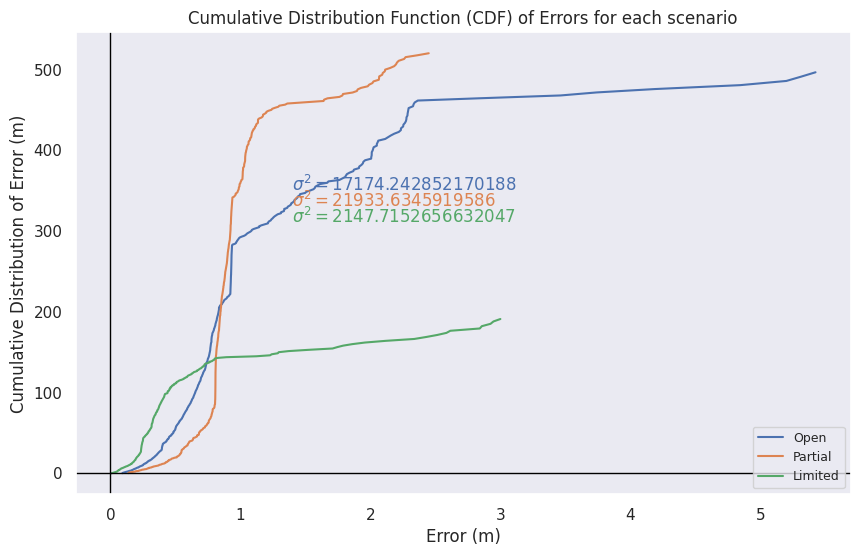

Variance of errors 0.4291389457432691
Variance of CDF 17174.242852170188
Variance of errors 0.12212597164076158
Variance of CDF 21933.6345919586
Variance of errors 0.1671023089482602
Variance of CDF 2147.7152656632047


In [25]:
# Define the radius of the Earth in kilometers. This value will be used in the Haversine formula to calculate distances.
radius_earth_km = 6371.0

# Function to calculate the Haversine distance between two points on the Earth's surface
# Parameters:
#   latitude1, longitude1 - Coordinates of the first point (in degrees)
#   latitude2, longitude2 - Coordinates of the second point (in degrees)
# Returns:
#   distance_m - The Haversine distance between the two points in meters
def haversineDistance(latitude1, longitude1, latitude2, longitude2):
    # Convert latitude and longitude from degrees to radians
    latitude1, longitude1, latitude2, longitude2 = map(math.radians, [latitude1, longitude1, latitude2, longitude2])
    
    # Compute the difference in latitudes and longitudes
    dlat = latitude2 - latitude1
    dlon = longitude2 - longitude1
    
    # Apply the Haversine formula to calculate the central angle between the two points
    a = math.sin(dlat / 2)**2 + math.cos(latitude1) * math.cos(latitude2) * math.sin(dlon / 2)**2
    central_angle = 2 * math.asin(math.sqrt(a))  # Central angle in radians
    
    # Calculate the distance in kilometers using the radius of the Earth and the central angle
    distance_km = radius_earth_km * central_angle
    
    # Convert the distance from kilometers to meters
    distance_m = distance_km * 1000
    
    # Return the distance in meters
    return distance_m

# Initialize lists to store the groundtruth (mean latitude and longitude) and distance errors for each scenario
groundtruth_per_scenario = []
distance_errors_per_fix_per_scenario = []

# Loop through each scenario's data (all_fix_data holds the fix data and titles holds the scenario labels)
for log_data, title in zip(all_fix_data, titles):
    # Extract latitudes and longitudes from the log_data for the current scenario
    latitudes = [entry["LatitudeDegrees"] for entry in log_data]
    longitudes = [entry["LongitudeDegrees"] for entry in log_data]
    
    # Calculate the mean latitude and longitude for the entire scenario (used as the ground truth)
    mean_latitude = sum(latitudes) / len(latitudes)
    mean_longitude = sum(longitudes) / len(longitudes)
    
    # Append the ground truth values (mean latitude and longitude) to the groundtruth_per_scenario list
    groundtruth_per_scenario.append((mean_latitude, mean_longitude))
    
    # Initialize a list to store the distance errors for each fix in the current scenario
    distance_error_per_fix = []

    # Loop through each latitude and longitude pair for the current scenario
    for latitude, longitude in zip(latitudes, longitudes):
        # Calculate the Haversine distance between the current fix and the ground truth (mean) location
        harvesine_distance = haversineDistance(latitude, longitude, mean_latitude, mean_longitude)
        
        # Append the calculated distance error (in meters) for the current fix to the distance_error_per_fix list
        distance_error_per_fix.append(harvesine_distance)
    
    # Append the list of distance errors for the current scenario to the distance_errors_per_fix_per_scenario list
    distance_errors_per_fix_per_scenario.append(distance_error_per_fix)

# Print the groundtruth (mean latitude and longitude) for each scenario
print("Groundtruth (mean latitude and longitude for each instance):")
print(groundtruth_per_scenario)

# Print the distance errors for each fix in each scenario
for errors, title in zip(distance_errors_per_fix_per_scenario, titles):
    print(f"Errors when Sky View is {title}:")
    print(errors)

# Initialize lists to store the variances and CDF variances for each scenario
variances = []
cdf_variances = []

# Create a figure for plotting the cumulative distribution function (CDF) of errors
plt.figure(figsize=(10, 6))

# Loop through each set of distance errors and corresponding title to plot the CDF
for i, (errors, title) in enumerate(zip(distance_errors_per_fix_per_scenario, titles)):
    # Sort the errors in ascending order for plotting the CDF
    sorted_errors = np.sort(errors)
    
    # Calculate the cumulative sum of the sorted errors to represent the CDF
    cumulative_distribution = np.cumsum(sorted_errors)

    # Calculate the variance of the errors for the current scenario
    variance = np.var(errors)
    variances.append(variance)
    
    # Calculate the variance of the CDF of errors for the current scenario
    cdf_variance = np.var(cumulative_distribution)
    cdf_variances.append(cdf_variance)

    # Plot the CDF for the current scenario
    plt.plot(sorted_errors, cumulative_distribution, label=f'{title}', color=cmap[i])

    # Add text to the plot showing the variance of the CDF for the current scenario
    plt.text(1.4, 350-i*20, rf"$\sigma^2 = {cdf_variance}$", color=cmap[i])

# Set the labels and title for the plot
plt.xlabel('Error (m)')
plt.ylabel('Cumulative Distribution of Error (m)')
plt.title('Cumulative Distribution Function (CDF) of Errors for each scenario')

# Add a legend to the plot
plt.legend(loc='lower right', fontsize=9)

# Add gridlines for easier reading of the plot
plt.axhline(y=0, color='black', linewidth=1)  # Horizontal line at y=0
plt.axvline(x=0, color='black', linewidth=1)  # Vertical line at x=0
plt.grid()

# Display the plot
plt.show()

# Print the variances of the errors and the variances of the CDF for each scenario
for variance, cdf_variance in zip(variances, cdf_variances):
    print(f"Variance of errors {variance}\nVariance of CDF {cdf_variance}")


##### Observations Task 2

Edit this section to put your observations.

### Task 3: Analyze status entries before fix and their relation to error [45 points] <a id='task3'></a>
Check the `status` entries prior to receiving a `fix`.
1. How many satellites were used for the fix (check the UsedInFix entry for the satellites) for the three locations? (state the median # of satellites)
2. How does the distance error for a fix correlate to the number of satellites used for that fix? Show scatter plots for the three locations. Summarize your observations.
3. How does the distance error for a fix correlate to the average SNR (Cn0DbHz entry) of the satellites that were used in the fix? Show scatter plots for the three locations. Summarize your observations.


### Summary of Comments:
1. **Data Initialization:** Lists are initialized to store metrics related to unique SVIDs, median satellites per fix, average C/N0 per fix, and median satellite counts.

2. **Main Loop:** Iterates over fix data and status data to calculate metrics like unique SVID counts, median satellites, and average C/N0 for each fix within each scenario.

3. **Plotting:** Multiple plots are generated, showing relationships between various metrics (e.g., unique SVID count, distance error, satellites used) across different scenarios. The plots include scatter plots, dashed lines for trends, and grids for clarity.

Unique SVID count per Scenario: [[0, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 8, 8, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1

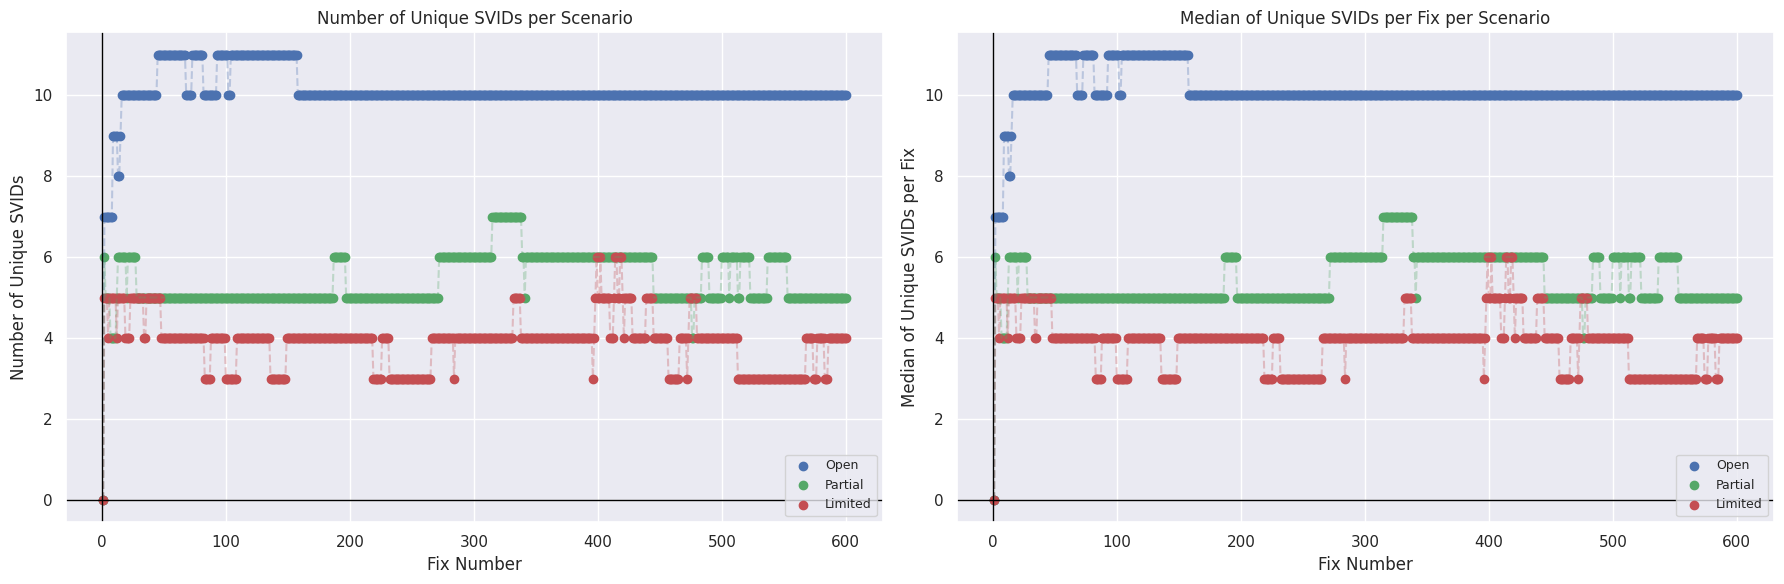

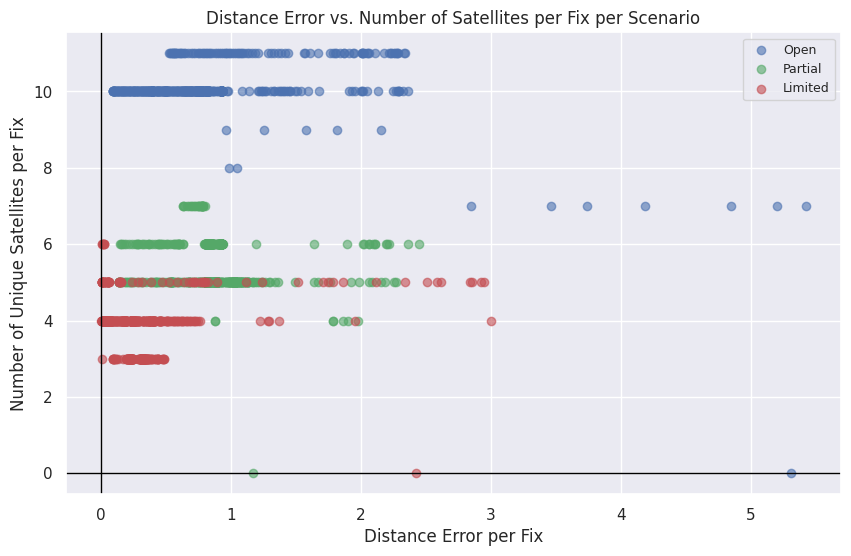

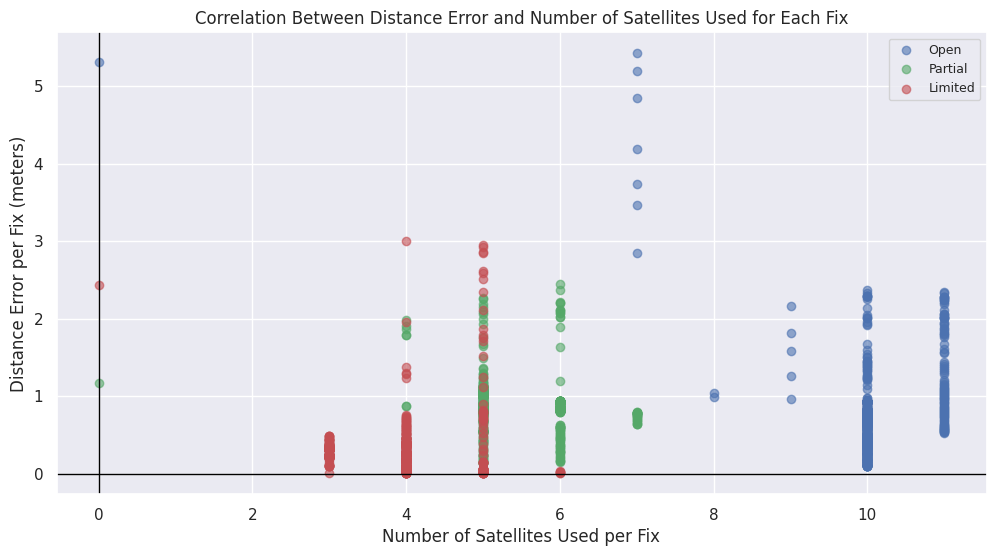

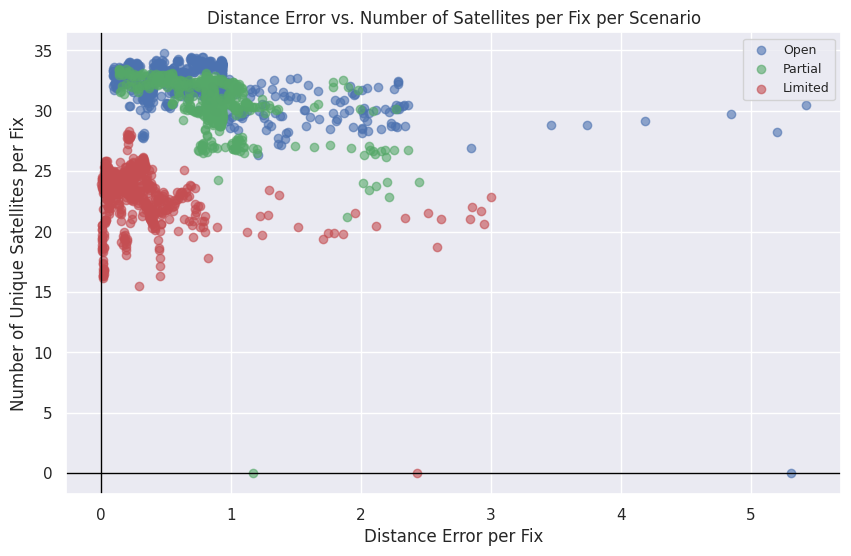

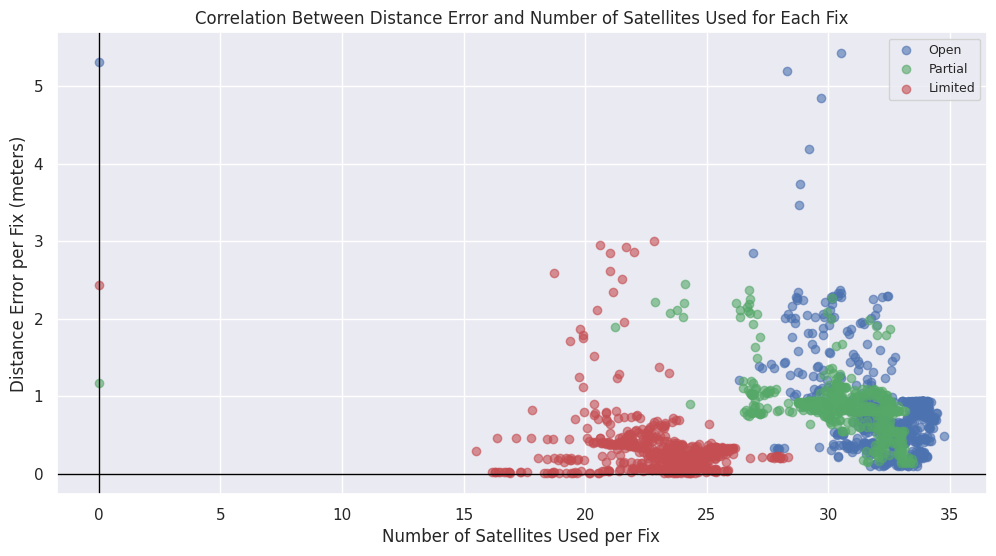

In [26]:
# Initialize empty lists to store the results for each scenario
# These lists will hold values like unique SVID counts, median satellites per fix, and average CN0 per fix
unique_svid_count_per_fix_per_scenario = []
median_satellites_per_fix_per_scenario = []
average_cn0dbhz_per_fix_per_scenario = []
median_satellites_per_scenario = []

# Loop through each set of fix data and corresponding status data for each scenario
# `all_fix_data` contains fix data (coordinates, timestamp, etc.) and `all_status_data` contains status data (satellite info)
for fix_data, status_data in zip(all_fix_data, all_status_data):
    # Initialize empty lists for each metric for the current scenario
    unique_svid_counts = []  # To store the number of unique SVIDs (satellite IDs) per fix
    median_satellites_per_fix = []  # To store the median number of satellites used in each fix
    average_cn0bdhz_per_fix = []  # To store the average C/N0 (carrier-to-noise density) per fix

    # Start by initializing `min_timestamp` to 0 (the earliest time for the first fix)
    min_timestamp = 0

    # Loop through each fix in the current scenario
    for fix in fix_data:
        max_timestamp = fix["UnixTimeMillis"]  # The timestamp for the current fix
        
        # Filter the status data to find entries that fall within the current fix's time range
        # Only include statuses where "UsedInFix" == 1 (indicating the satellite was used in the fix)
        status_in_range = [
            status for status in status_data
            if min_timestamp <= status["UnixTimeMillis"] < max_timestamp and status["UsedInFix"] == 1
        ]
        
        # Get the unique SVIDs (satellite IDs) from the filtered status data
        unique_svids = {status["Svid"] for status in status_in_range}
        
        # Count the number of unique SVIDs and append it to the list for this fix
        unique_svid_count = len(unique_svids)
        unique_svid_counts.append(unique_svid_count)
        
        # Calculate the median number of unique SVIDs used in the current fix and append it to the list
        median_satellites_per_fix.append(median([unique_svid_count]))
        
        # Get the C/N0 (carrier-to-noise density) values for the satellites used in this fix
        cn0dbhz_values = [status["Cn0DbHz"] for status in status_in_range if "Cn0DbHz" in status]
        
        # If there are C/N0 values, calculate the average C/N0, otherwise set it to 0
        if cn0dbhz_values:
            avg_cn0 = sum(cn0dbhz_values) / len(cn0dbhz_values)
        else:
            avg_cn0 = 0
        
        # Append the average C/N0 for this fix to the list
        average_cn0bdhz_per_fix.append(avg_cn0)
        
        # Update the minimum timestamp to be the maximum timestamp of the current fix (for the next iteration)
        min_timestamp = max_timestamp

    # After processing all fixes in the current scenario, append the lists of results for this scenario
    unique_svid_count_per_fix_per_scenario.append(unique_svid_counts)
    median_satellites_per_fix_per_scenario.append(median_satellites_per_fix)
    average_cn0dbhz_per_fix_per_scenario.append(average_cn0bdhz_per_fix)
    
    # Calculate the median number of unique SVIDs used across all fixes in the current scenario
    median_satellites_per_scenario.append(median(unique_svid_counts))

# Print out the calculated metrics for each scenario
print("Unique SVID count per Scenario:", unique_svid_count_per_fix_per_scenario)
print("Median number of satellites per Fix per Scenario:", median_satellites_per_fix_per_scenario)
print("Average Cn0DbHz per Fix per Scenario:", average_cn0dbhz_per_fix_per_scenario)
print("Median number of satellites per Scenario:", median_satellites_per_scenario)

# Define a set of colors for plotting
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Create two subplots side by side for the first set of plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot the number of unique SVIDs used per fix for each scenario
for idx, (unique_svid_counts, title) in enumerate(zip(unique_svid_count_per_fix_per_scenario, titles)):
    fix_numbers = list(range(1, len(unique_svid_counts) + 1))  # Create a list of fix numbers (1, 2, 3, ...)
    color = colors[idx % len(colors)]  # Choose a color from the predefined list
    
    # Scatter plot for unique SVID counts vs. fix number
    ax1.scatter(fix_numbers, unique_svid_counts, color=color, label=f'{title}')
    
    # Add a dashed line connecting the points to show trends
    ax1.plot(fix_numbers, unique_svid_counts, linestyle='--', color=color, alpha=0.3)

# Label the x and y axes, and set the title for the first plot
ax1.set_xlabel("Fix Number")
ax1.set_ylabel("Number of Unique SVIDs")
ax1.set_title("Number of Unique SVIDs per Scenario")
ax1.legend(loc='lower right', fontsize=9)  # Add legend to the plot
ax1.axhline(y=0, color='black', linewidth=1)  # Add a horizontal line at y=0 for reference
ax1.axvline(x=0, color='black', linewidth=1)  # Add a vertical line at x=0 for reference
ax1.grid(True)  # Enable gridlines

# Plot the median number of satellites used per fix for each scenario
for idx, (median_counts, title) in enumerate(zip(median_satellites_per_fix_per_scenario, titles)):
    fix_numbers = list(range(1, len(median_counts) + 1))  # Create a list of fix numbers
    color = colors[idx % len(colors)]  # Choose a color for this scenario
    
    # Scatter plot for median satellite counts vs. fix number
    ax2.scatter(fix_numbers, median_counts, color=color, label=f'{title}')
    
    # Add a dashed line connecting the points to show trends
    ax2.plot(fix_numbers, median_counts, linestyle='--', color=color, alpha=0.3)

# Label the x and y axes, and set the title for the second plot
ax2.set_xlabel("Fix Number")
ax2.set_ylabel("Median of Unique SVIDs per Fix")
ax2.set_title("Median of Unique SVIDs per Fix per Scenario")
ax2.legend(loc='lower right', fontsize=9)  # Add legend to the plot
ax2.axhline(y=0, color='black', linewidth=1)  # Add a horizontal line at y=0 for reference
ax2.axvline(x=0, color='black', linewidth=1)  # Add a vertical line at x=0 for reference
ax2.grid(True)  # Enable gridlines

# Adjust the layout of the subplots so they don't overlap
plt.tight_layout()

# Display the plot
plt.show()

# Define a new set of colors for the scatter plots
colors = ['b', 'g', 'r']

# Create a new plot to show the relationship between distance error and the number of satellites used per fix
plt.figure(figsize=(10, 6))
for idx, (errors, svid_counts, title) in enumerate(zip(distance_errors_per_fix_per_scenario, unique_svid_count_per_fix_per_scenario, titles)):
    color = colors[idx % len(colors)]  # Choose a color for this scenario
    
    # Scatter plot for distance errors vs. number of satellites used
    plt.scatter(errors, svid_counts, color=color, label=f'{title}', alpha=0.6)

# Label the x and y axes and set the title for the plot
plt.xlabel("Distance Error per Fix")
plt.ylabel("Number of Unique Satellites per Fix")
plt.title("Distance Error vs. Number of Satellites per Fix per Scenario")
plt.legend(loc='upper right', fontsize=9)  # Add legend to the plot
plt.axhline(y=0, color='black', linewidth=1)  # Add a horizontal line at y=0 for reference
plt.axvline(x=0, color='black', linewidth=1)  # Add a vertical line at x=0 for reference
plt.grid(True)  # Enable gridlines

# Display the plot
plt.show()

# Create another plot showing the relationship between the number of satellites used per fix and the distance error
plt.figure(figsize=(12, 6))
for idx, (errors, svid_counts, title) in enumerate(zip(distance_errors_per_fix_per_scenario, unique_svid_count_per_fix_per_scenario, titles)):
    color = colors[idx % len(colors)]  # Choose a color for this scenario
    
    # Scatter plot for the number of satellites used vs. distance error
    plt.scatter(svid_counts, errors, color=color, label=f'{title}', alpha=0.6)

# Label the x and y axes and set the title for the plot
plt.xlabel("Number of Satellites Used per Fix")
plt.ylabel("Distance Error per Fix (meters)")
plt.title("Correlation Between Distance Error and Number of Satellites Used for Each Fix")
plt.legend(loc='upper right', fontsize=9)  # Add legend to the plot
plt.axhline(y=0, color='black', linewidth=1)  # Add a horizontal line at y=0 for reference
plt.axvline(x=0, color='black', linewidth=1)  # Add a vertical line at x=0 for reference
plt.grid(True)  # Enable gridlines

# Display the plot
plt.show()

# Plot distance error vs. the number of satellites and average C/N0
plt.figure(figsize=(10, 6))
for idx, (errors, svid_counts, title) in enumerate(zip(distance_errors_per_fix_per_scenario, average_cn0dbhz_per_fix_per_scenario, titles)):
    color = colors[idx % len(colors)]  # Choose a color for this scenario
    
    # Scatter plot for distance errors vs. average C/N0
    plt.scatter(errors, svid_counts, color=color, label=f'{title}', alpha=0.6)

# Label the x and y axes and set the title for the plot
plt.xlabel("Distance Error per Fix")
plt.ylabel("Number of Unique Satellites per Fix")
plt.title("Distance Error vs. Number of Satellites per Fix per Scenario")
plt.legend(loc='upper right', fontsize=9)  # Add legend to the plot
plt.axhline(y=0, color='black', linewidth=1)  # Add a horizontal line at y=0 for reference
plt.axvline(x=0, color='black', linewidth=1)  # Add a vertical line at x=0 for reference
plt.grid(True)  # Enable gridlines

# Display the plot
plt.show()

# Create a final plot to show the relationship between number of satellites and distance error, 
# and average C/N0 per fix for each scenario
plt.figure(figsize=(12, 6))
for idx, (errors, svid_counts, title) in enumerate(zip(distance_errors_per_fix_per_scenario, average_cn0dbhz_per_fix_per_scenario, titles)):
    color = colors[idx % len(colors)]  # Choose a color for this scenario
    
    # Scatter plot for number of satellites vs. distance error
    plt.scatter(svid_counts, errors, color=color, label=f'{title}', alpha=0.6)

# Label the x and y axes and set the title for the plot
plt.xlabel("Number of Satellites Used per Fix")
plt.ylabel("Distance Error per Fix (meters)")
plt.title("Correlation Between Distance Error and Number of Satellites Used for Each Fix")
plt.legend(loc='upper right', fontsize=9)  # Add legend to the plot
plt.axhline(y=0, color='black', linewidth=1)  # Add a horizontal line at y=0 for reference
plt.axvline(x=0, color='black', linewidth=1)  # Add a vertical line at x=0 for reference
plt.grid(True)  # Enable gridlines

# Display the plot
plt.show()


##### Observations Task 3

Edit this section to put your observations.

### Task 4: Show satellite statistics and SNR plots by azimuth and elevation [20 points] <a id='task4'></a>
Only consider the `status` instances where a particular satellite was used for a location fix.
1. Show a table for the `Svid`, `Average Azimuth`, `Average Elevation`, `Average SNR` (each row for a specific satellite).
1. Plot `Average Azimuth` (0 - 360 degrees) with `Average SNR` (see Note)
1. Plot `Average Elevation` (0, 90 degrees) with `Average SNR`



<div class="alert alert-block alert-info">
    <div style="display:flex; margin:20px;">
        <img src="./images/image1.jpg" width="300" height="200" >
        <div style="margin:20px;">
            <h2> How to calculate the azimuth corresponding to the direction of the window or door?</h2>
            <p>Take the two points (Lat1, Lon1) and (Lat2, Lon2) and use <a href="https://www.fcc.gov/media/radio/distance-and-azimuths">this website</a>, or any other online azimuth calculator. Basically, the azimuth gives you the angle the black line makes with 0 degrees north.
            </p>
        </div>
    </div>
</div>

### Summary of Comments:

1. **Data Collection:** The code first initializes a dictionary (`svid_data`) to collect satellite information for each satellite ID (`Svid`) in each scenario. It accumulates C/N0, azimuth, and elevation data for each satellite.

2. **Averaging Data:** After collecting data for each satellite, the code calculates the average C/N0, azimuth, and elevation for each satellite and stores it in a new dictionary (`svid_averages`).

3. **Creating Tables:** A table for each scenario is constructed with columns for the satellite ID, average azimuth, average elevation, and average SNR (C/N0). These tables are stored in a list (`status_tables_per_scenario`).

4. **Displaying Results:** The `tabulate` library is used to print each scenario’s table in a grid format.

5. **Plotting:** Two subplots are created: one for plotting the relationship between average azimuth and average SNR, and the other for average elevation vs. average SNR. The scatter plots also include dashed lines to show trends.

6. **Ground Truth Comparison:** The latitudes and longitudes for two specific ground truth points are printed.

7. **Image Display:** The code displays an image related to azimuth calculation with a title, without axes.

Scenario : Sky is Open
+--------+-------------------+---------------------+---------------+
|   Svid |   Average Azimuth |   Average Elevation |   Average SNR |
+========+===================+=====================+===============+
|      3 |          252.57   |            53.1233  |       36.1251 |
+--------+-------------------+---------------------+---------------+
|      4 |          331.754  |            40.5088  |       23.2789 |
+--------+-------------------+---------------------+---------------+
|      7 |          272.727  |             6.48464 |       29.0058 |
+--------+-------------------+---------------------+---------------+
|      8 |          174.725  |            16.1284  |       36.1449 |
+--------+-------------------+---------------------+---------------+
|      9 |          318.513  |            13.769   |       32.4681 |
+--------+-------------------+---------------------+---------------+
|     16 |           47.5467 |            76.8517  |       36.755  |
+--------+-

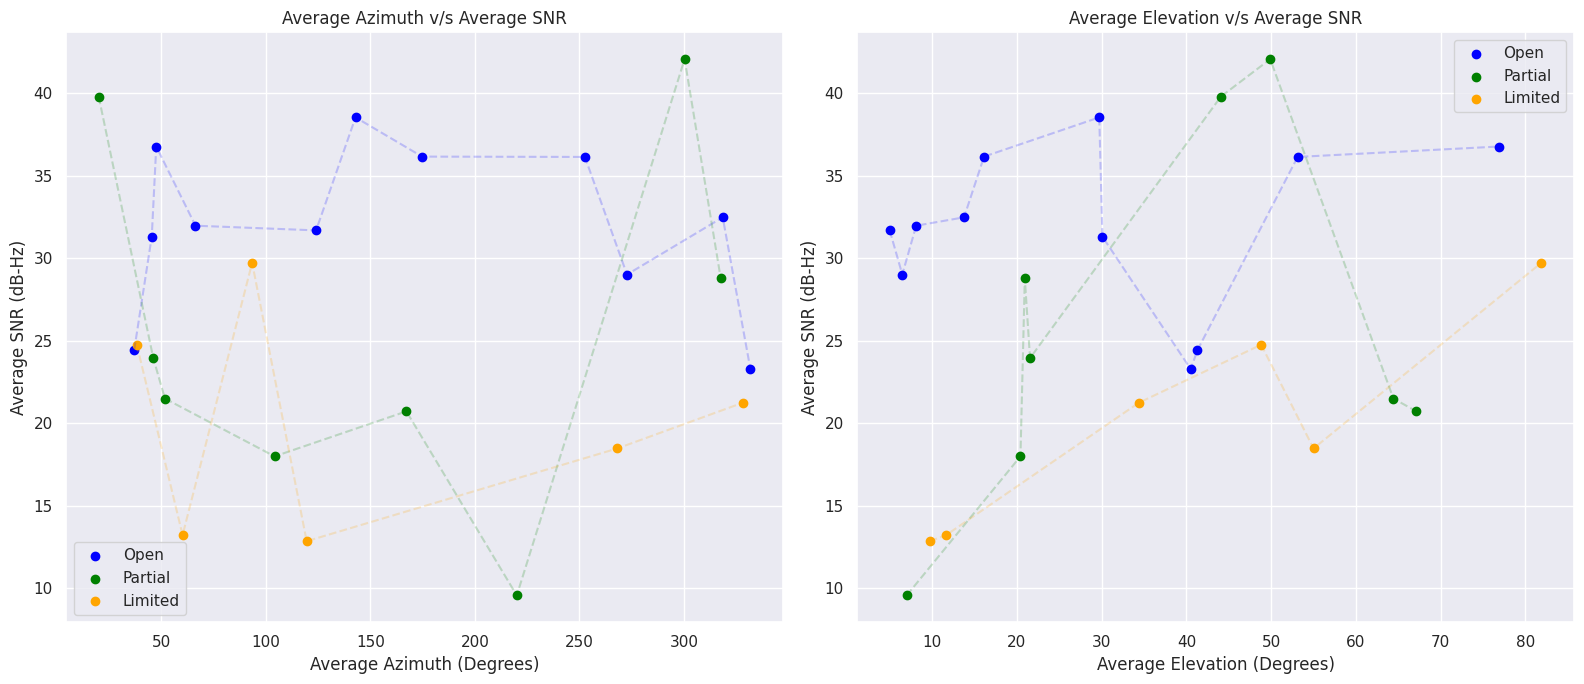

Point 1: Latitude = 22.5949213, Longitude = 88.3617331
Point 2: Latitude = 22.5947863, Longitude = 88.3617751


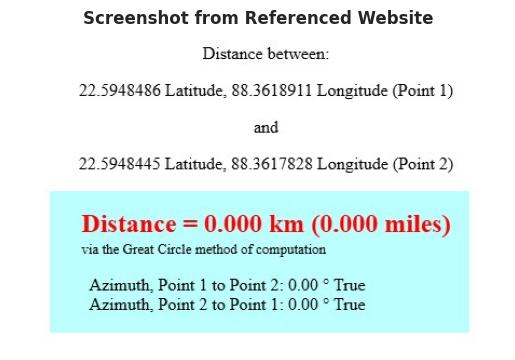

In [27]:
# Initialize empty lists to store averaged status data and status tables for each scenario
averaged_status_data_per_satellite_per_scenario = []
status_tables_per_scenario = []

# Iterate over each set of status data from all scenarios
for status_data in all_status_data:
    svid_data = {}  # Dictionary to store data for each satellite (Svid)

    # Loop through each status entry to accumulate satellite data
    for status in status_data:
        svid = status["Svid"]  # Extract the satellite ID
        if svid not in svid_data:
            # Initialize data for the new satellite if it's not already present
            svid_data[svid] = {
                "Cn0DbHz": [],  # List to store C/N0 values (signal strength)
                "AzimuthDegrees": [],  # List to store azimuth angle values
                "ElevationDegrees": []  # List to store elevation angle values
            }
        # Append the values to the respective lists for the satellite
        svid_data[svid]["Cn0DbHz"].append(status["Cn0DbHz"])
        svid_data[svid]["AzimuthDegrees"].append(status["AzimuthDegrees"])
        svid_data[svid]["ElevationDegrees"].append(status["ElevationDegrees"])

    # Dictionary to store average values per satellite
    svid_averages = {}
    for svid in sorted(svid_data):  # Sort the satellites by their ID
        values = svid_data[svid]
        # Calculate the average for C/N0, Azimuth, and Elevation
        svid_averages[svid] = {
            "AvgCn0DbHz": math.fsum(values["Cn0DbHz"]) / len(values["Cn0DbHz"]),
            "AvgAzimuthDegrees": math.fsum(values["AzimuthDegrees"]) / len(values["AzimuthDegrees"]),
            "AvgElevationDegrees": math.fsum(values["ElevationDegrees"]) / len(values["ElevationDegrees"])
        }

    # Append the averaged satellite data for the current scenario
    averaged_status_data_per_satellite_per_scenario.append(svid_averages)

# Create tables for each scenario based on the averaged satellite data
for i, avg_data in enumerate(averaged_status_data_per_satellite_per_scenario):
    table_data = {
        "Svid": [],  # List for satellite IDs
        "Average Azimuth": [],  # List for average azimuth values
        "Average Elevation": [],  # List for average elevation values
        "Average SNR": []  # List for average signal-to-noise ratio (SNR)
    }

    # Populate the table with the averaged data for each satellite
    for svid, averages in avg_data.items():
        table_data["Svid"].append(svid)
        table_data["Average Azimuth"].append(averages["AvgAzimuthDegrees"])
        table_data["Average Elevation"].append(averages["AvgElevationDegrees"])
        table_data["Average SNR"].append(averages["AvgCn0DbHz"])

    # Create a DataFrame from the table data
    df = pd.DataFrame(table_data)
    # Sort the DataFrame by satellite ID (Svid)
    df.sort_values("Svid", inplace=True)
    # Append the sorted DataFrame to the list of status tables for each scenario
    status_tables_per_scenario.append(df)

# Print the tables for each scenario, formatted in a grid layout
for i, (df, title) in enumerate(zip(status_tables_per_scenario, titles), start=1):
    print(f"Scenario : Sky is {title}")
    print(tabulate(df, headers="keys", tablefmt="grid", showindex=False))  # Use grid format for borders
    print("\n")

# Define colors for plotting
colors = ['blue', 'green', 'orange']

# Create a 1x2 grid of subplots with specific figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# For each scenario, plot Average Azimuth vs. Average SNR
for i, (df, color, title) in enumerate(zip(status_tables_per_scenario, colors, titles), start=1):
    sorted_df = df.sort_values(by="Average Azimuth")  # Sort DataFrame by average azimuth
    # Scatter plot of Average Azimuth vs. Average SNR
    axes[0].scatter(sorted_df["Average Azimuth"], sorted_df["Average SNR"], color=color, label=f'{title}', alpha=1)
    # Plot a dashed line showing the trend
    axes[0].plot(sorted_df["Average Azimuth"], sorted_df["Average SNR"], color=color, linestyle='--', alpha=0.2)

# Set labels and titles for the first subplot
axes[0].set_xlabel("Average Azimuth (Degrees)")
axes[0].set_ylabel("Average SNR (dB-Hz)")
axes[0].set_title("Average Azimuth v/s Average SNR")
axes[0].legend()  # Show legend
axes[0].grid(True)  # Enable grid

# For each scenario, plot Average Elevation vs. Average SNR
for i, (df, color, title) in enumerate(zip(status_tables_per_scenario, colors, titles), start=1):
    sorted_df = df.sort_values(by="Average Elevation")  # Sort DataFrame by average elevation
    # Scatter plot of Average Elevation vs. Average SNR
    axes[1].scatter(sorted_df["Average Elevation"], sorted_df["Average SNR"], color=color, label=f'{title}', alpha=1)
    # Plot a dashed line showing the trend
    axes[1].plot(sorted_df["Average Elevation"], sorted_df["Average SNR"], color=color, linestyle='--', alpha=0.2)

# Set labels and titles for the second subplot
axes[1].set_xlabel("Average Elevation (Degrees)")
axes[1].set_ylabel("Average SNR (dB-Hz)")
axes[1].set_title("Average Elevation v/s Average SNR")
axes[1].legend()  # Show legend
axes[1].grid(True)  # Enable grid

# Adjust layout to prevent overlap and show the plot
plt.tight_layout()
plt.show()

# Print specific ground truth coordinates for the comparison of two points
point_1 = groundtruth_per_scenario[1]  # Ground truth for point 1
point_2 = groundtruth_per_scenario[0]  # Ground truth for point 2
print(f"Point 1: Latitude = {point_1[0]:.7f}, Longitude = {point_1[1]:.7f}")
print(f"Point 2: Latitude = {point_2[0]:.7f}, Longitude = {point_2[1]:.7f}")

# Open an image to display with title and no axis labels
plt.figure()
img = Image.open("dipendu_data/images/azimuth_calculation/azimuth_calculation.jpg")
plt.imshow(img)  # Display the image
plt.title("Screenshot from Referenced Website", fontweight="bold")  # Add title
plt.axis(False)  # Hide the axis
plt.show()  # Show the image


##### Observations Task 4

Edit this section to put your observations.

### Task 5: Plot SNR by azimuth in angular space with satellite image [10 points] <a id='task5'></a>

<!-- <div style="display: flex; justify-content: center;">
        <img src="./images/image4.jpg" width="300" height="300">
        <img src="./images/image5.png" width="400" height="300">
    <p style="float: right; margin-left: 10px;">
        See the figures to the left. Two example plots are also shown on the right for your reference. Either you can plot in the cartesian space or in the angular (R, theta) space. Magnitude of R can signify your SNR. To make it more interesting, you can superimpose the angular plot on a satellite image, say from Google maps (of course, you need to rotate the image to align the azimuths). This should show the effect of buildings, trees, obstacles on the SNR. Does your plot (particularly, for location 2, where the phone is kept on the window sill or door) peak for a certain azimuth? This azimuth should roughly match with the direction of the clear sky from that location.
    </p>
</div> -->

<div style="display: block; justify-content: center; align-items: center; margin: 20px">
  <div style="display: flex; justify-content: center; align-items: center;">
    <img src="./images/image4.jpg" width="300" height="300">
    <img src="./images/image5.png" width="400" height="300">
  </div>
  <p style="margin-left: 10px;">See the figures above. Two example plots are also shown on the right for your reference. Either you can plot in the cartesian space or in the angular (R, theta) space. Magnitude of R can signify your SNR. To make it more interesting, you can superimpose the angular plot on a satellite image, say from Google maps (of course, you need to rotate the image to align the azimuths). This should show the effect of buildings, trees, obstacles on the SNR. Does your plot (particularly, for location 2, where the phone is kept on the window sill or door) peak for a certain azimuth? This azimuth should roughly match with the direction of the clear sky from that location.</p>
</div>

### Summary of Comments:
1. **Figure Setup:**
   - A new figure is created with a size of 8x8 inches, and the current figure object is retrieved.
   
2. **Axes Setup:**
   - The code defines the coordinates for placing the axes within the figure (`axes_coords`), with values specifying the position and size of the plot area.
   - Two axes objects are created: one for the image (`ax_image`) and one for the polar plot (`ax_polar`).

3. **Image Display:**
   - An image (`my_location.jpg`) is displayed in the specified axes (`ax_image`), with transparency (`alpha=0.7`) and the aspect ratio set to "auto". The axes for the image are turned off to hide them.

4. **Polar Plot Setup:**
   - A polar plot is created using the same axes coordinates, and its background is made semi-transparent with `patch.set_alpha(0.2)`. The direction of the angular axis is reversed to make it clockwise.

5. **Plotting Data:**
   - The code loops through the status data for each scenario, converts azimuth angles to radians, and extracts SNR values.
   - The scatter plot for each scenario is plotted on the polar axis (`ax_polar`) using triangle markers, and a grid is enabled.

6. **Labels and Title:**
   - The x-axis (radial) is labeled as "SNR (dB)" and the y-axis (angular) as "Azimuth (degrees)".
   - A super title is set for the entire figure to explain the plot's purpose.

7. **Legend and Display:**
   - A legend is added to distinguish between the scenarios.
   - Finally, the plot is displayed using `plt.show()`.

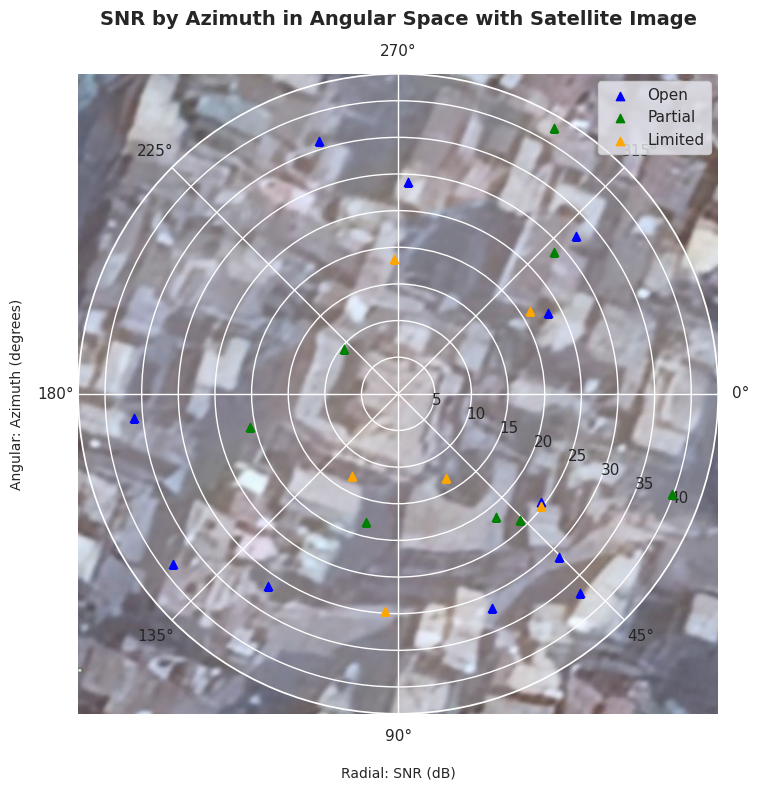

In [28]:
# Create a new figure with specified size (8x8 inches)
plt.figure(figsize=(8, 8))
# Get the current figure object (gcf)
fig = plt.gcf()

# Define coordinates for the axes [left, bottom, width, height]
# This determines the position and size of the axes in the figure
axes_coords = [0.1, 0.1, 0.8, 0.8]

# Add an axes object for displaying the image
ax_image = fig.add_axes(axes_coords)  # Position of the image axes
# Display an image on the axes, set alpha for transparency and adjust the aspect ratio
ax_image.imshow(Image.open("dipendu_data/images/azimuth_calculation/my_location.jpg"), alpha=0.7, aspect="auto")
# Turn off the axes for the image to only show the image
ax_image.axis("off")

# Add an axes object for the polar plot (with same coordinates but a polar projection)
ax_polar = fig.add_axes(axes_coords, projection="polar")
# Set transparency for the polar plot background (alpha = 0.2)
ax_polar.patch.set_alpha(0.2)
# Set the direction of the angular axis (counterclockwise by default, so we set -1 for clockwise)
ax_polar.set_theta_direction(-1)

# Loop through each scenario’s DataFrame, associated color, and title
for i, (df, color, title) in enumerate(zip(status_tables_per_scenario, colors, titles), start=1):
    # Convert the average azimuth angles to radians for polar plot (polar plots require radians)
    theta = np.radians(df["Average Azimuth"])
    # Extract the average SNR (signal-to-noise ratio) values to use as radial distance in the polar plot
    r = df["Average SNR"]
    
    # Scatter plot for each scenario on the polar axis with specified color and marker (triangle up)
    ax_polar.scatter(theta, r, color=color, marker="^", label=f'{title}')
    # Enable grid lines in the polar plot for better readability
    ax_polar.grid(True)

# Set the x-label for the polar plot (radial axis represents SNR, in dB)
ax_polar.set_xlabel("\nRadial: SNR (dB)", fontsize=10)
# Set the y-label for the polar plot (angular axis represents Azimuth, in degrees)
ax_polar.set_ylabel("Angular: Azimuth (degrees)\n\n\n", fontsize=10)

# Set a super title for the entire figure
plt.suptitle("SNR by Azimuth in Angular Space with Satellite Image", fontweight="bold", fontsize=14)
# Add a legend to the plot to distinguish between different scenarios
plt.legend()
# Display the final plot
plt.show()


##### Observations Task 5

Edit this section to put your observations.